In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [101]:
import numpy as np
import mne
import matplotlib.pyplot as plt
import ghibtools as gh
import pandas as pd
import seaborn as sns
from params import *
from bibliotheque import get_info

In [102]:
info = get_info()

In [28]:
bandpower = pd.read_excel('../Tables/bandpower.xlsx', index_col = 0)

In [29]:
bandpower

participant session    odor  state  bloc  trial chan        band  \
0              P01   ses03  odor_o     33  Free      1  Fp1       delta   
1              P01   ses03  odor_o     33  Free      1  Fp1       theta   
2              P01   ses03  odor_o     33  Free      1  Fp1       alpha   
3              P01   ses03  odor_o     33  Free      1  Fp1        beta   
4              P01   ses03  odor_o     33  Free      1  Fp1   low_gamma   
...            ...     ...     ...    ...   ...    ...  ...         ...   
255745         P28   ses04  odor_-     29  Fast      3  Fp2  high_gamma   
255746         P28   ses04  odor_-     29  Fast      3  Fp2     100_200   
255747         P28   ses04  odor_-     29  Fast      3  Fp2     200_300   
255748         P28   ses04  odor_-     29  Fast      3  Fp2     300_400   
255749         P28   ses04  odor_-     29  Fast      3  Fp2     400_500   

           power  
0       0.067579  
1       0.028063  
2       0.039423  
3       0.005502  
4       0.002373  
...          ...  
255745  0.004250  
255746  0.003750  
255747  0.001439  
255748  0.000160  
255749  0.000017  

[255750 rows x 9 columns]

<AxesSubplot: xlabel='band', ylabel='power'>

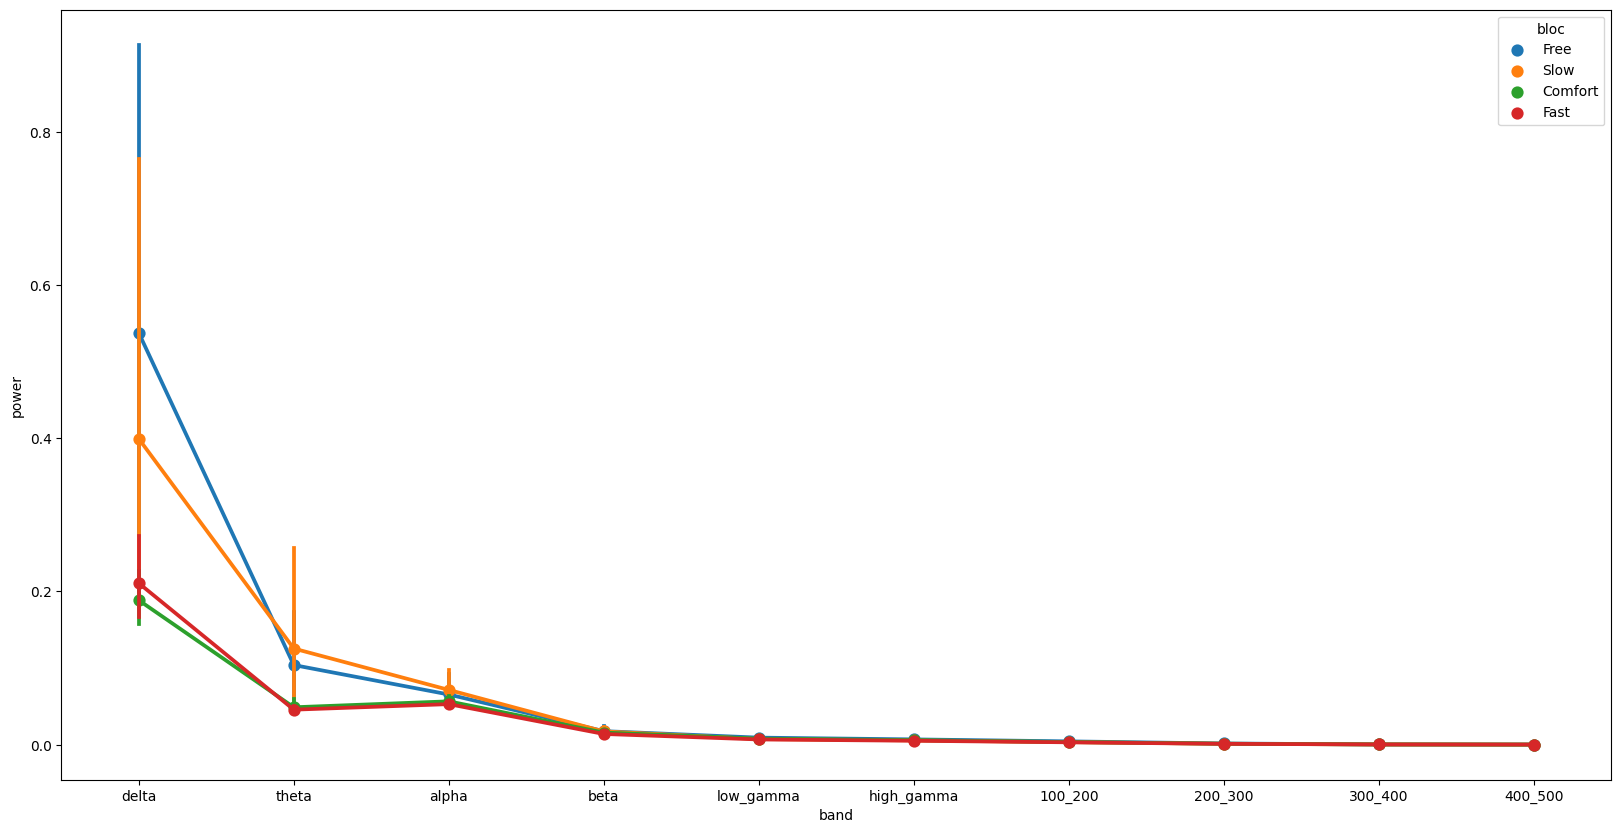

In [30]:
fig, ax = plt.subplots(figsize = (20,10))
sns.pointplot(data=bandpower, x = 'band', y = 'power', hue = 'bloc',ax=ax)

<AxesSubplot: xlabel='band', ylabel='power'>

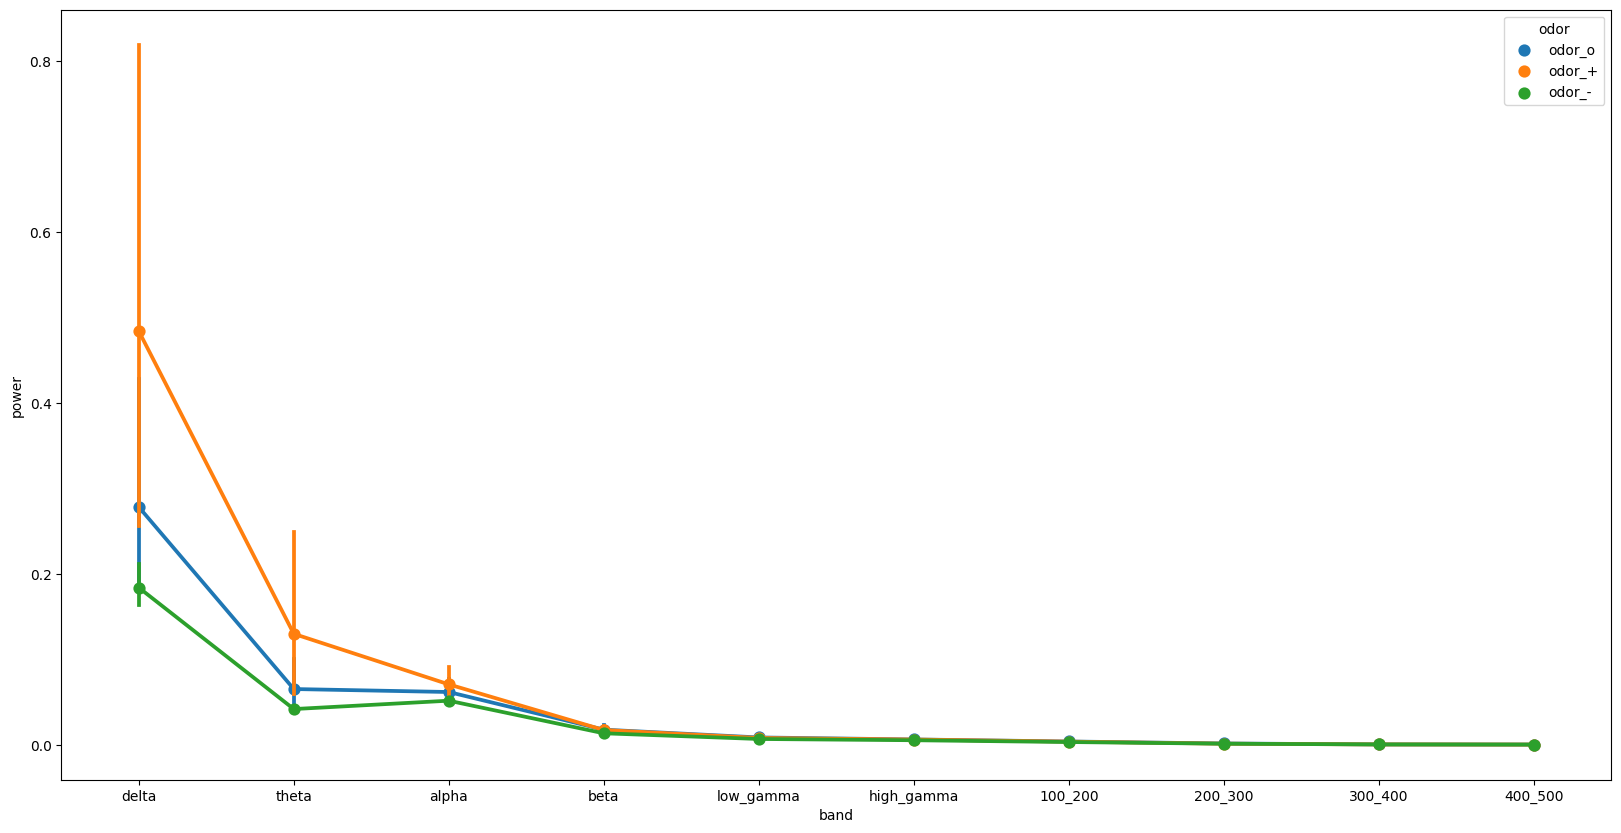

In [31]:
fig, ax = plt.subplots(figsize = (20,10))
sns.pointplot(data=bandpower, x = 'band', y = 'power', hue = 'odor',ax=ax)

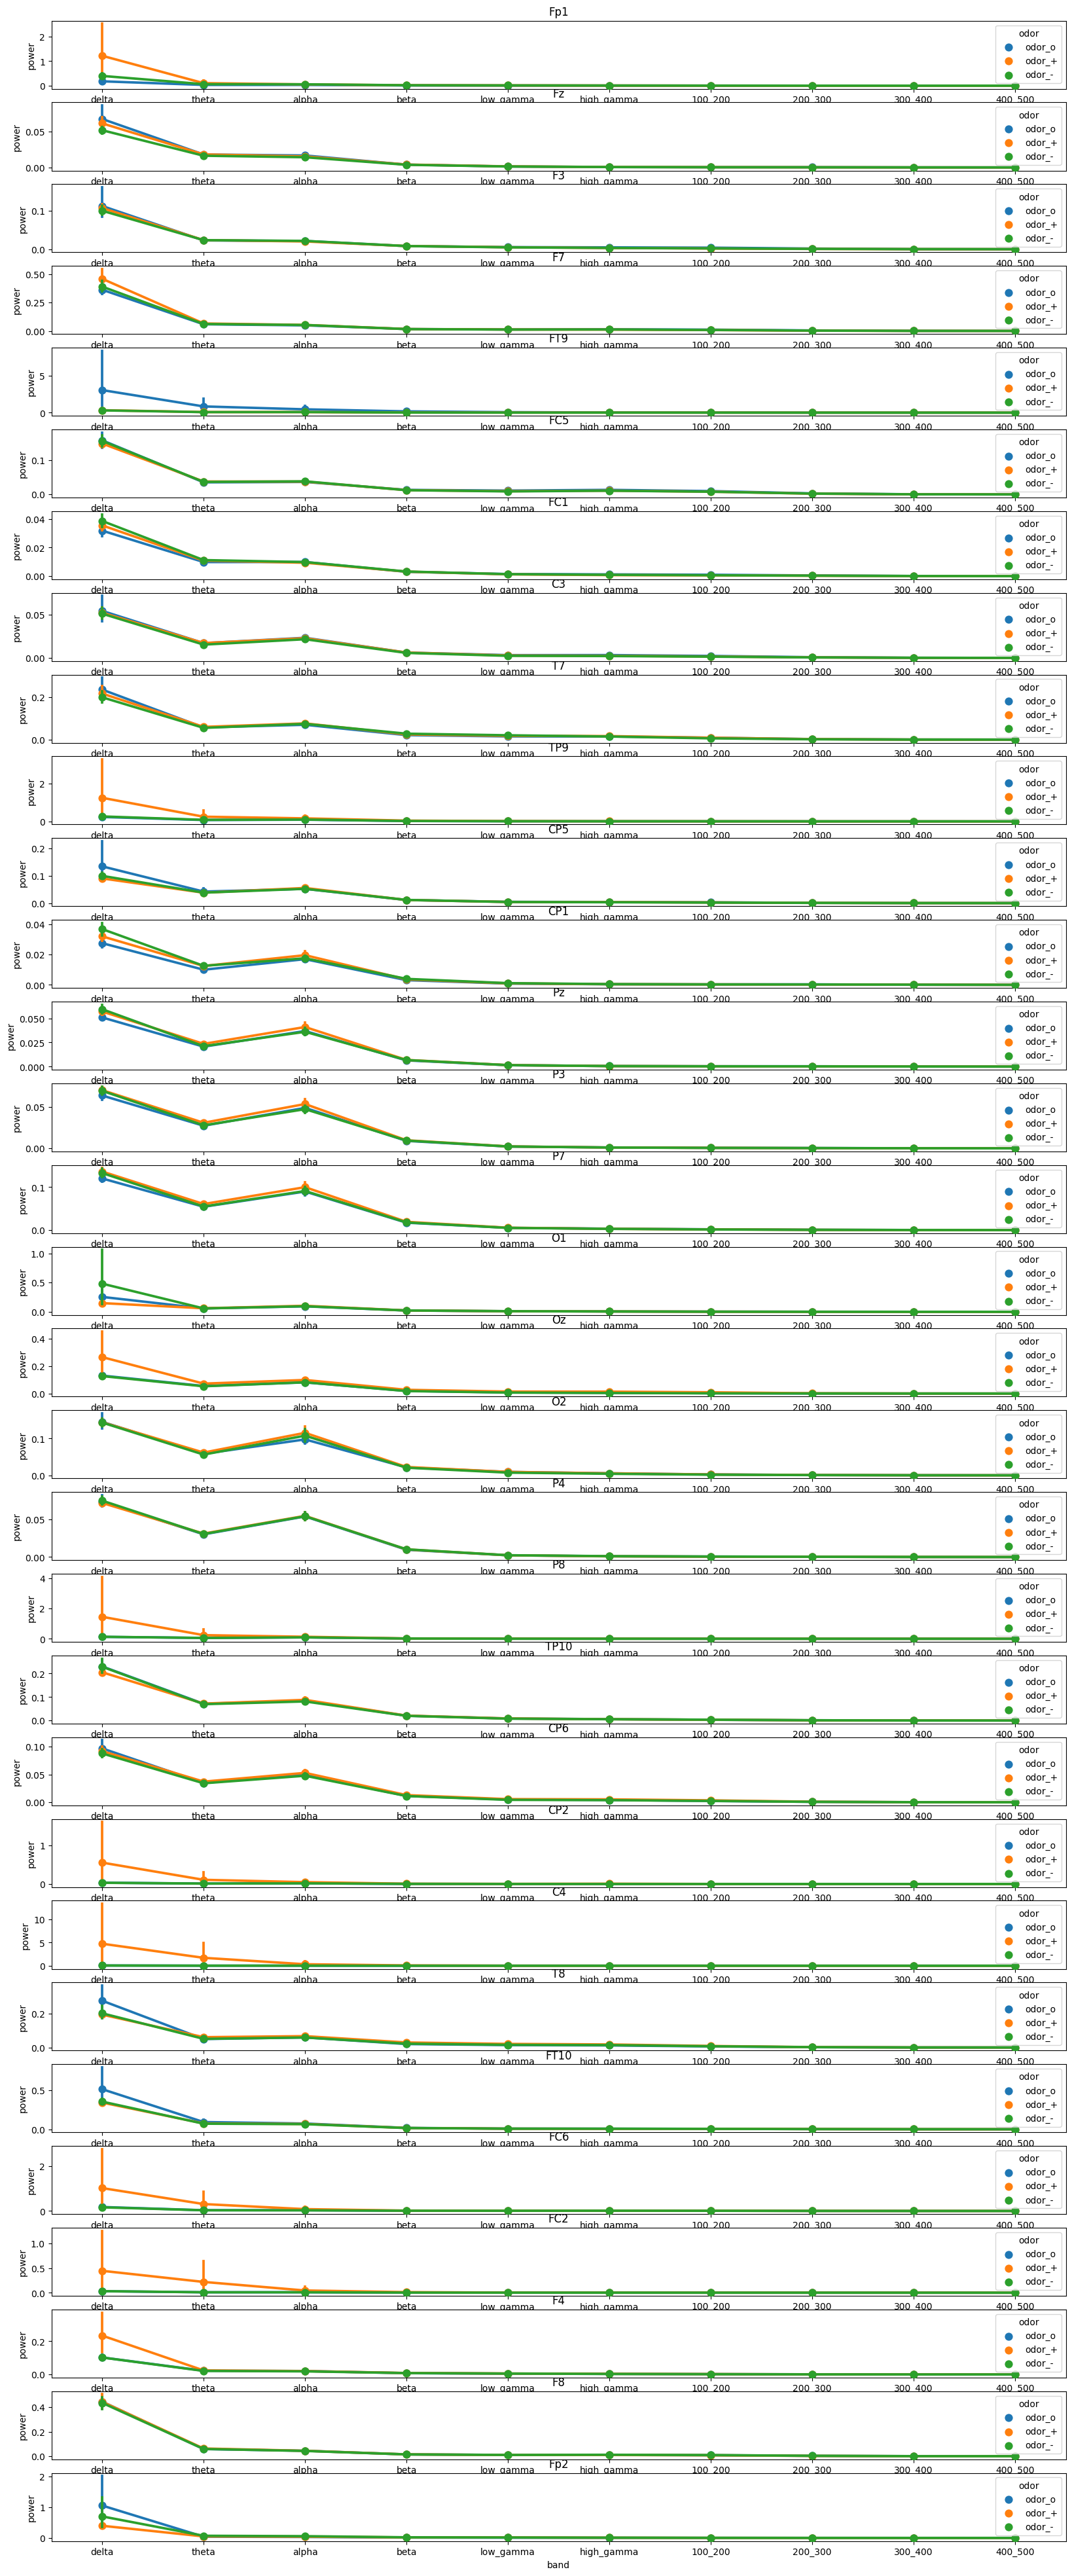

In [32]:
fig, axs = plt.subplots(nrows = len(eeg_chans), figsize = (20,50))
for row, chan in enumerate(eeg_chans):
    ax = axs[row]
    ax.set_title(chan)
    sns.pointplot(data=bandpower[bandpower['chan'] == chan], x = 'band', y = 'power', hue = 'odor',ax=ax)

NameError: name 'vlim' is not defined

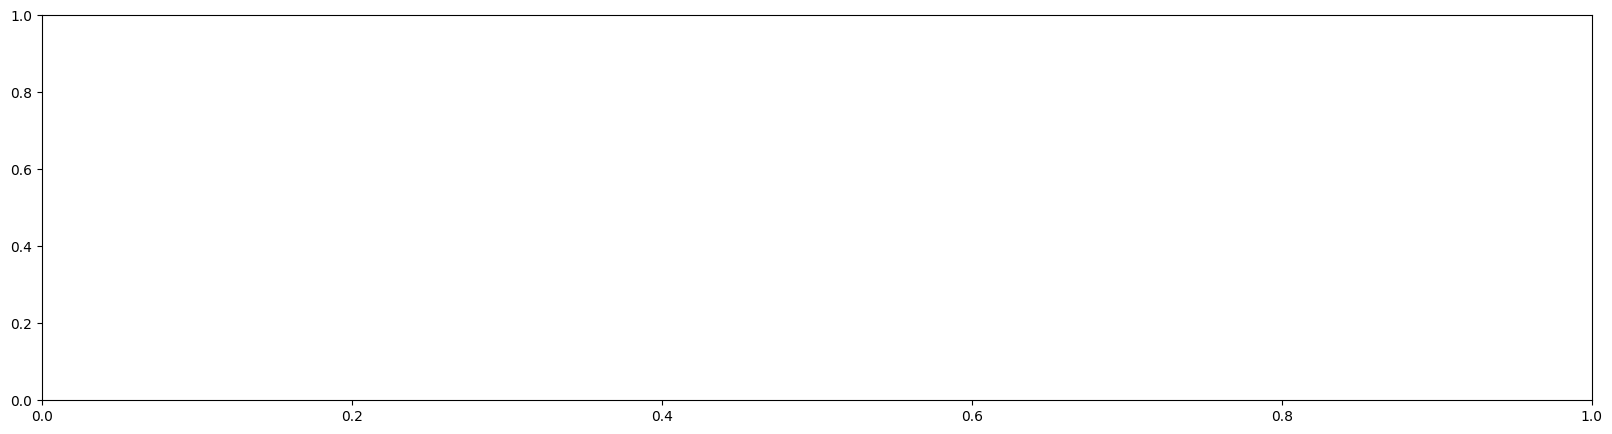

In [39]:
fig, ax = plt.subplots(figsize = (20,5))
for chan in bandpower['chan'].unique():
    data= bandpower[bandpower['chan'] == chan]
    image = mne.viz.plot_topomap(data=data,pos = info, names = eeg_chans, axes=ax, show = False, vlim=vlim, cmap = 'Reds')

In [33]:
alpha_bandpower = bandpower[bandpower['band'] == 'alpha']

In [34]:
alpha_bandpower

participant session    odor  state  bloc  trial chan   band     power
2              P01   ses03  odor_o     33  Free      1  Fp1  alpha  0.039423
12             P01   ses03  odor_o     33  Free      1   Fz  alpha  0.035118
22             P01   ses03  odor_o     33  Free      1   F3  alpha  0.040614
32             P01   ses03  odor_o     33  Free      1   F7  alpha  0.060140
42             P01   ses03  odor_o     33  Free      1  FT9  alpha  0.078799
...            ...     ...     ...    ...   ...    ...  ...    ...       ...
255702         P28   ses04  odor_-     29  Fast      3  FC6  alpha  0.055738
255712         P28   ses04  odor_-     29  Fast      3  FC2  alpha  0.020144
255722         P28   ses04  odor_-     29  Fast      3   F4  alpha  0.035683
255732         P28   ses04  odor_-     29  Fast      3   F8  alpha  0.072154
255742         P28   ses04  odor_-     29  Fast      3  Fp2  alpha  0.059872

[25575 rows x 9 columns]

<AxesSubplot: xlabel='bloc', ylabel='power'>

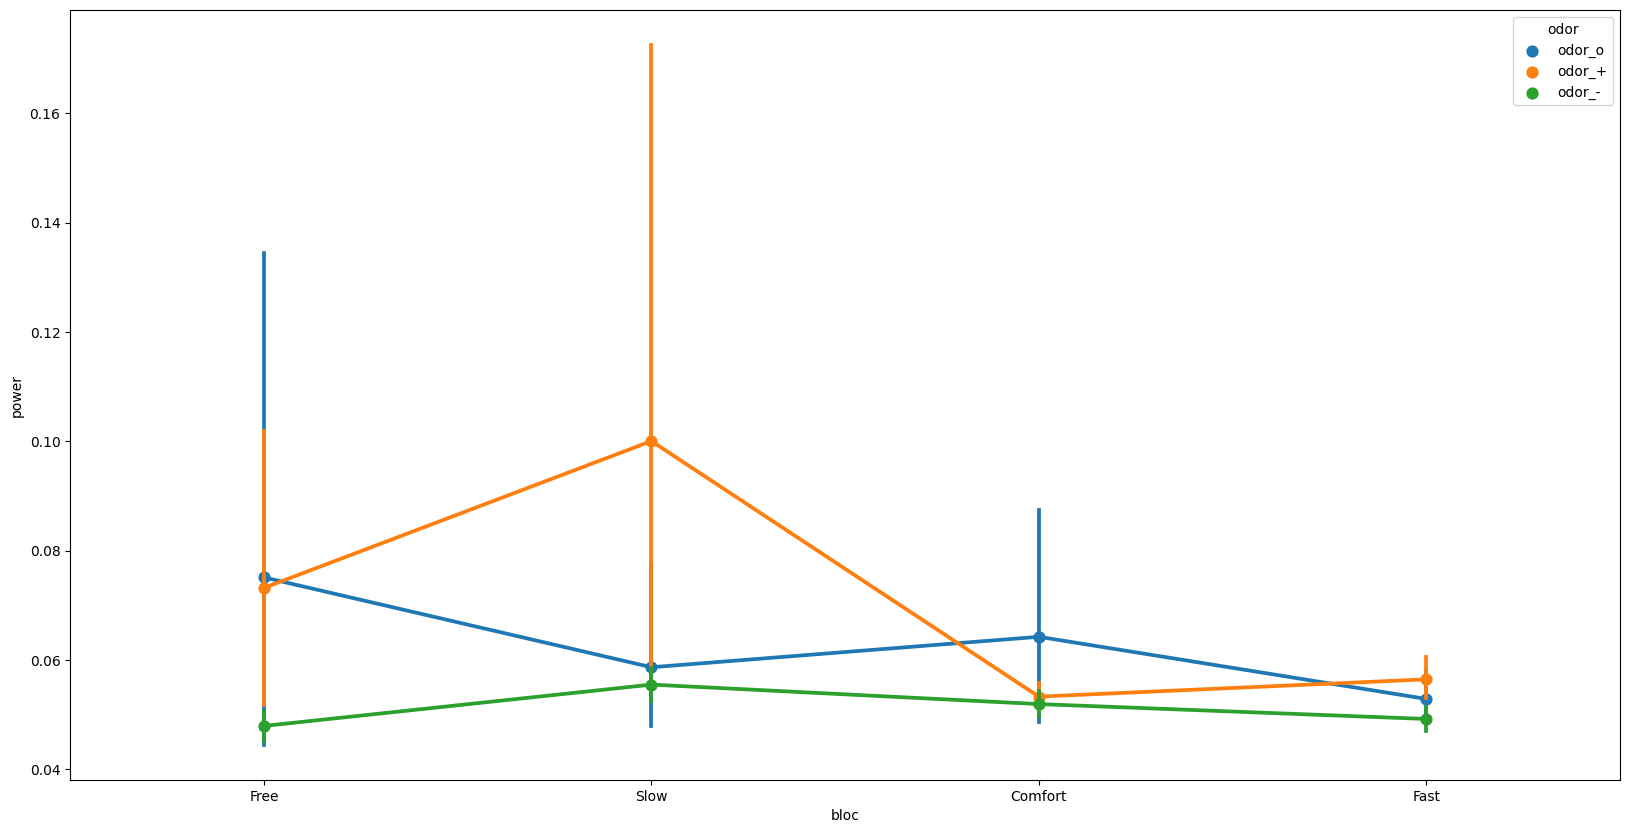

In [35]:
fig, ax = plt.subplots(figsize = (20,10))
sns.pointplot(data=alpha_bandpower, x = 'bloc', y = 'power', hue = 'odor',ax=ax)

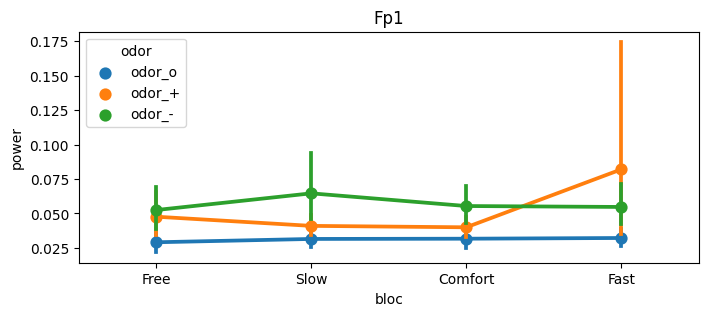

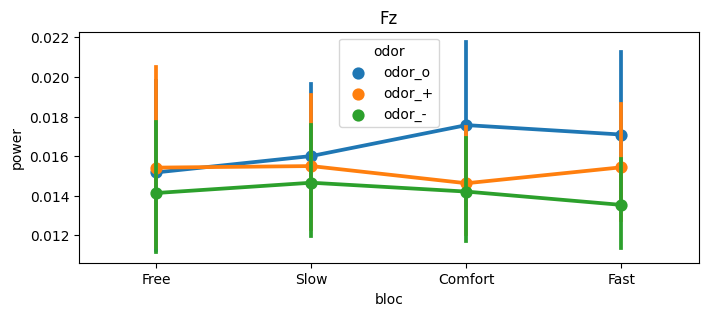

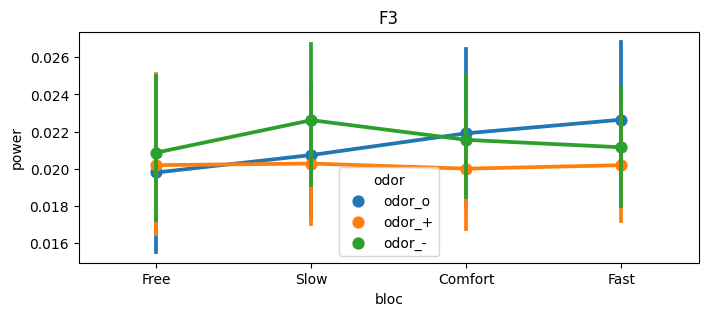

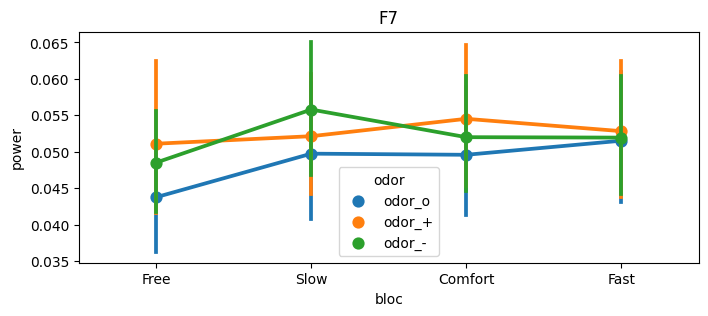

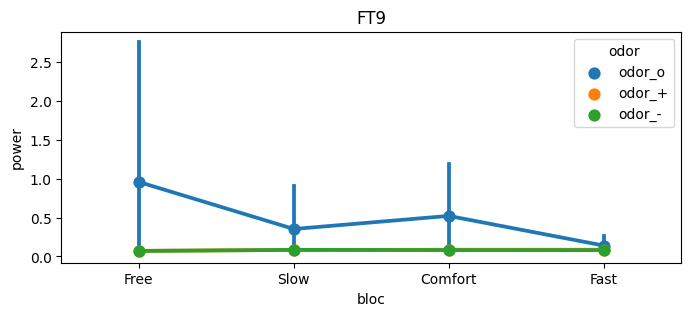

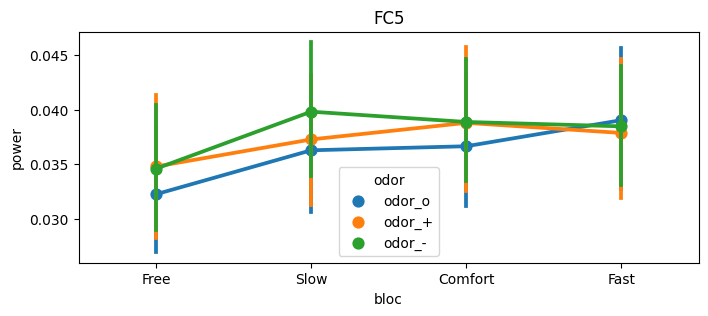

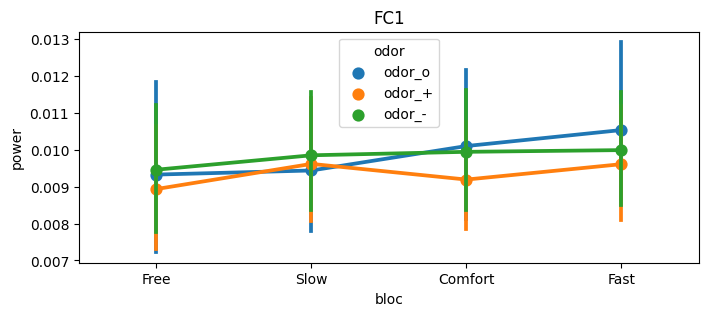

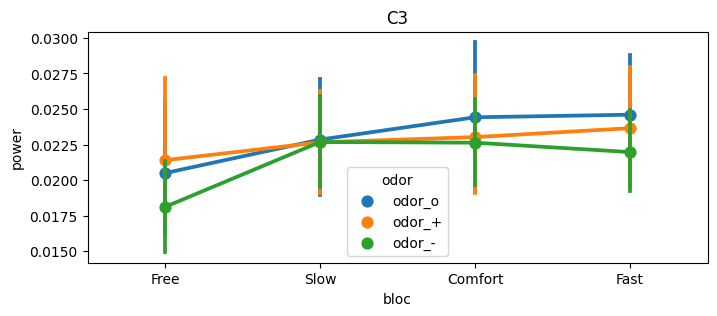

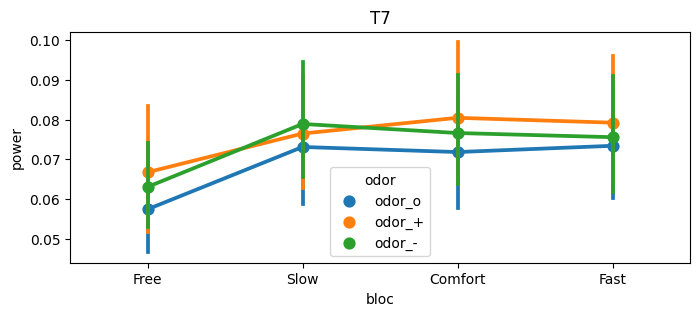

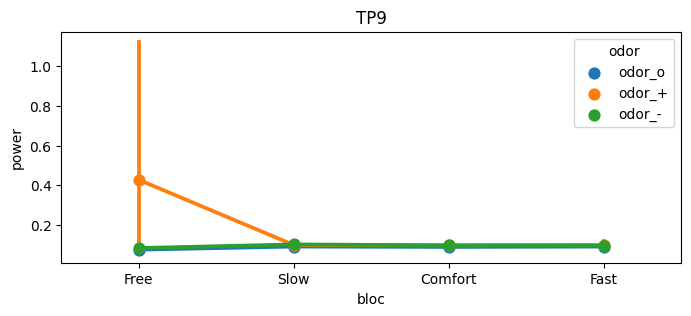

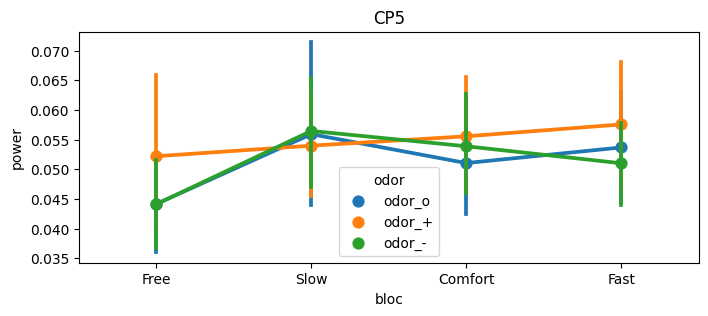

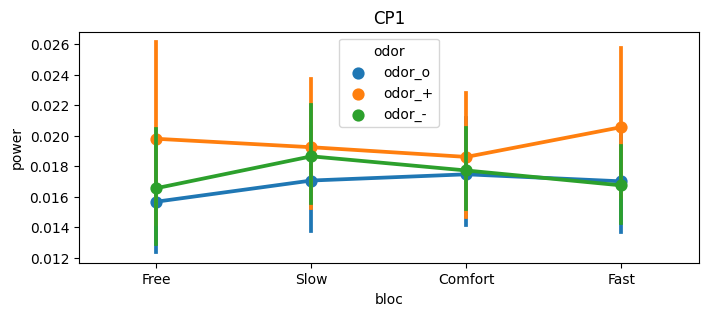

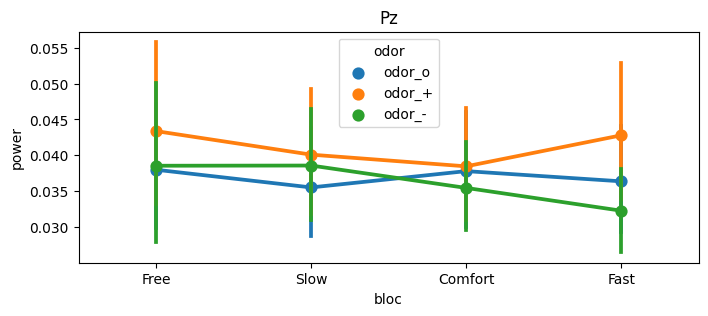

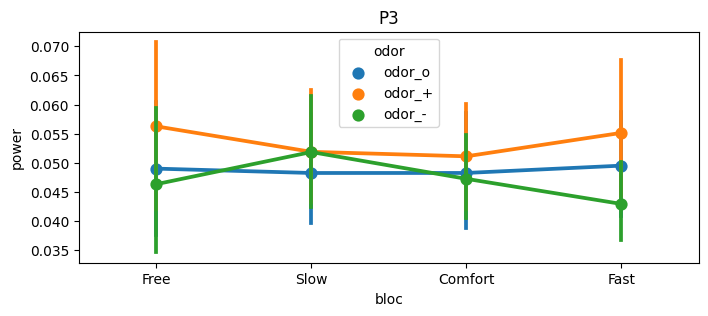

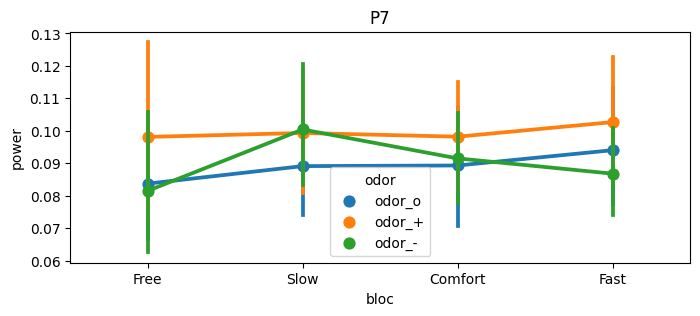

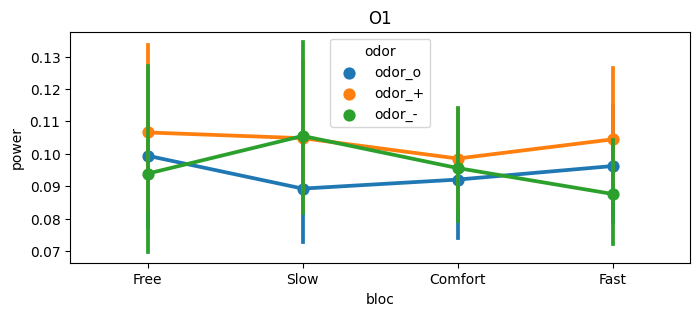

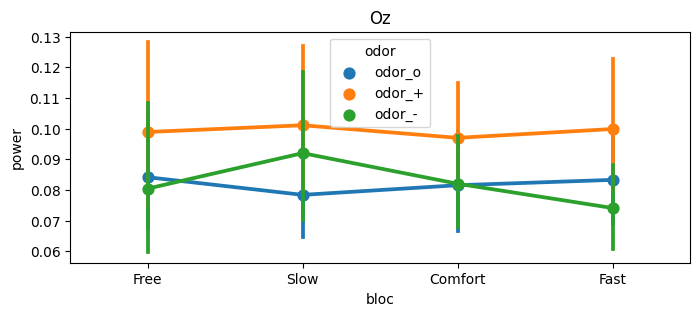

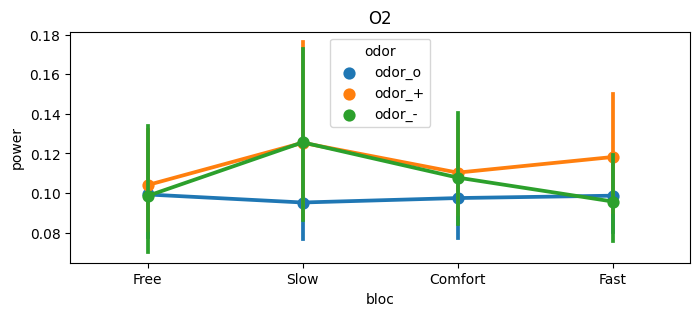

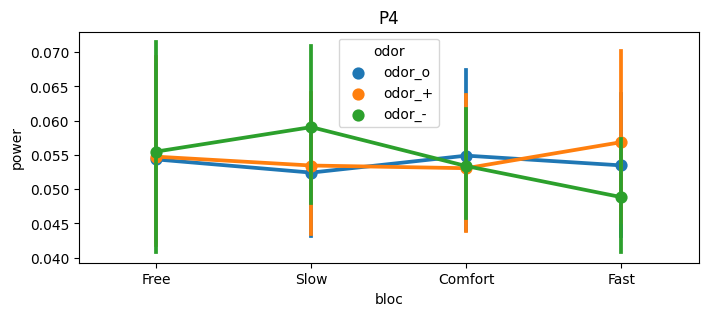

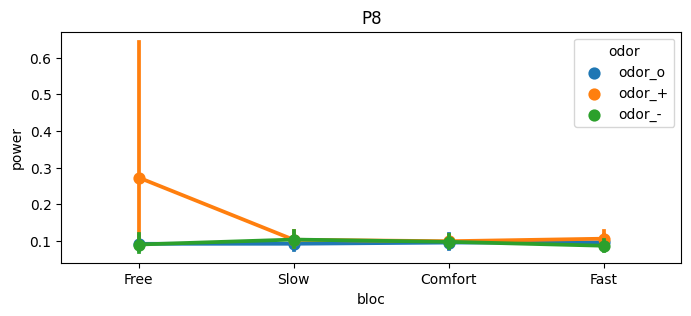

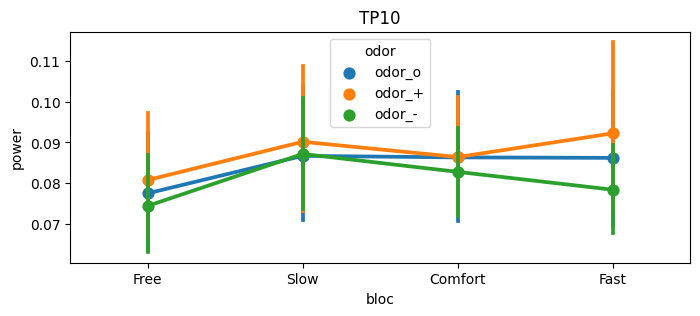

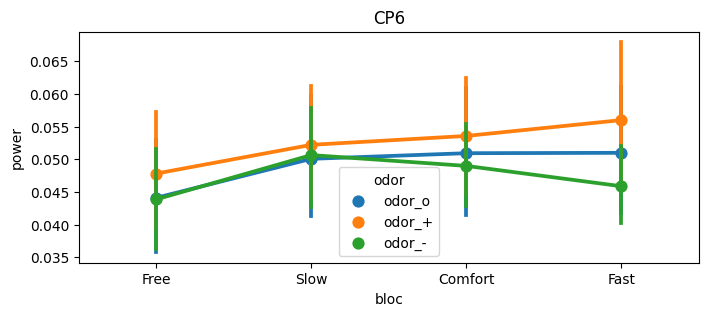

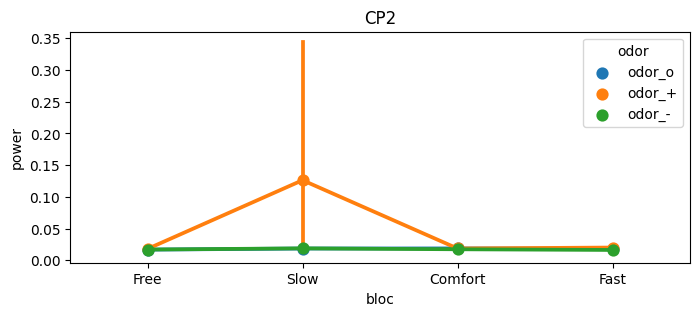

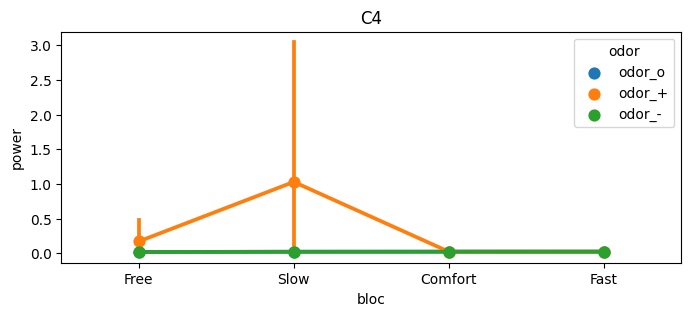

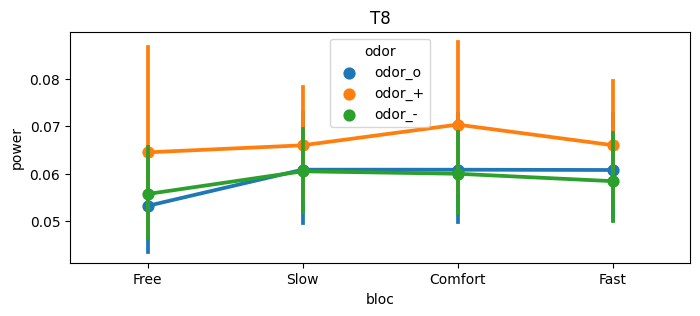

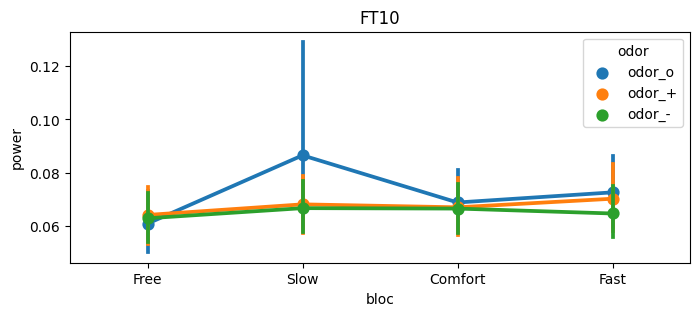

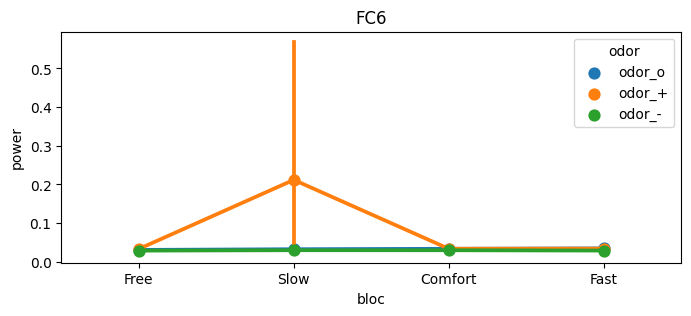

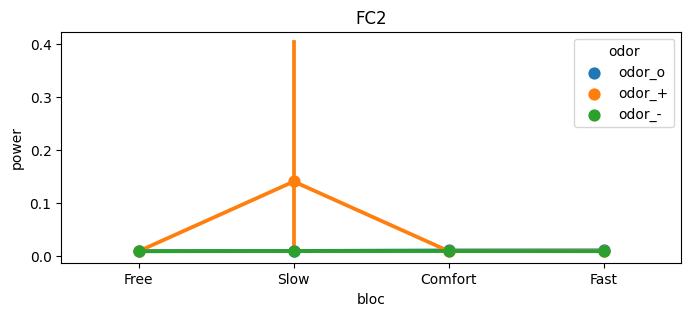

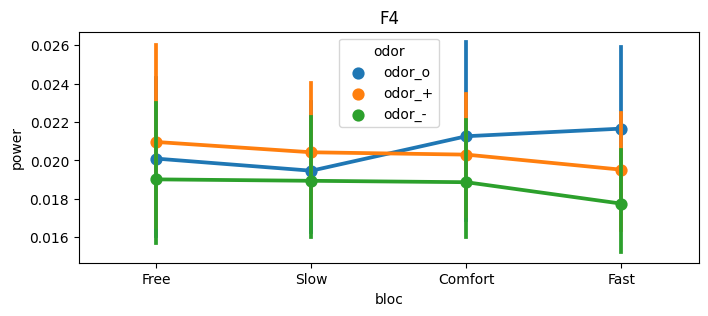

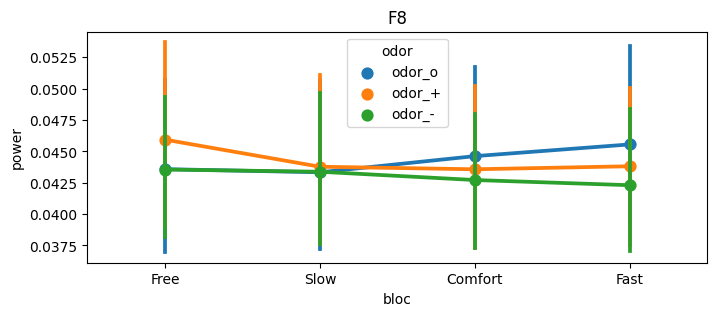

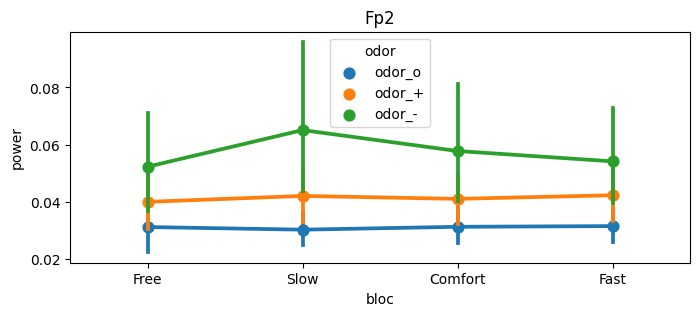

In [109]:
for chan in eeg_chans:
    alpha_band_power_chan = alpha_bandpower[alpha_bandpower['chan'] == chan]
    fig, ax = plt.subplots(figsize = (8,3))
    sns.pointplot(data=alpha_band_power_chan, x = 'bloc', y = 'power', hue = 'odor', ax=ax)
    ax.set_title(chan)
    plt.show()

In [110]:
bandpower

participant session    odor  state  bloc  trial chan        band  \
0              P01   ses03  odor_o     33  Free      1  Fp1       delta   
1              P01   ses03  odor_o     33  Free      1  Fp1       theta   
2              P01   ses03  odor_o     33  Free      1  Fp1       alpha   
3              P01   ses03  odor_o     33  Free      1  Fp1        beta   
4              P01   ses03  odor_o     33  Free      1  Fp1   low_gamma   
...            ...     ...     ...    ...   ...    ...  ...         ...   
255745         P28   ses04  odor_-     29  Fast      3  Fp2  high_gamma   
255746         P28   ses04  odor_-     29  Fast      3  Fp2     100_200   
255747         P28   ses04  odor_-     29  Fast      3  Fp2     200_300   
255748         P28   ses04  odor_-     29  Fast      3  Fp2     300_400   
255749         P28   ses04  odor_-     29  Fast      3  Fp2     400_500   

           power  
0       0.067579  
1       0.028063  
2       0.039423  
3       0.005502  
4       0.002373  
...          ...  
255745  0.004250  
255746  0.003750  
255747  0.001439  
255748  0.000160  
255749  0.000017  

[255750 rows x 9 columns]

delta (0.00975490014101301, 2.4084069281455953)
theta (0.003673584638099665, 0.1890220852175654)
alpha (0.0023363428771699373, 0.35085891770378586)
beta (0.0011170825011863152, 0.08503727829420765)
low_gamma (0.0003873207099369806, 0.08602389843987375)
high_gamma (0.00015360287822645567, 0.0853559246806592)
100_200 (0.00010380478309713505, 0.06171452258558486)
200_300 (6.169784364587271e-05, 0.01978079197058711)
300_400 (1.467330725311424e-05, 0.0024410975335096754)
400_500 (1.7636223645227773e-06, 0.00033484773234433176)


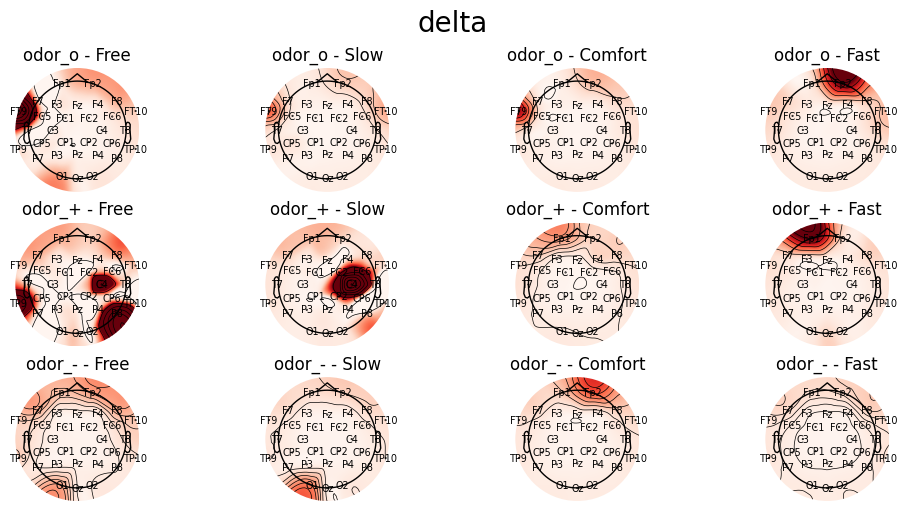

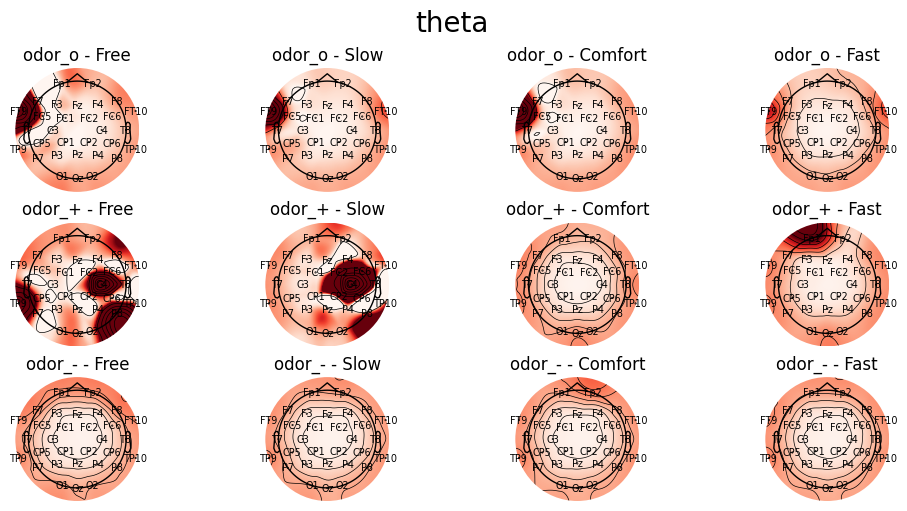

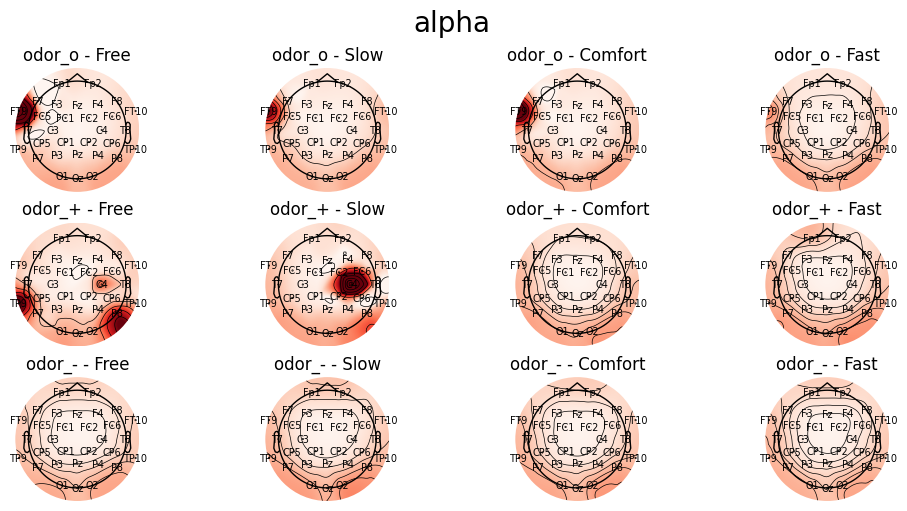

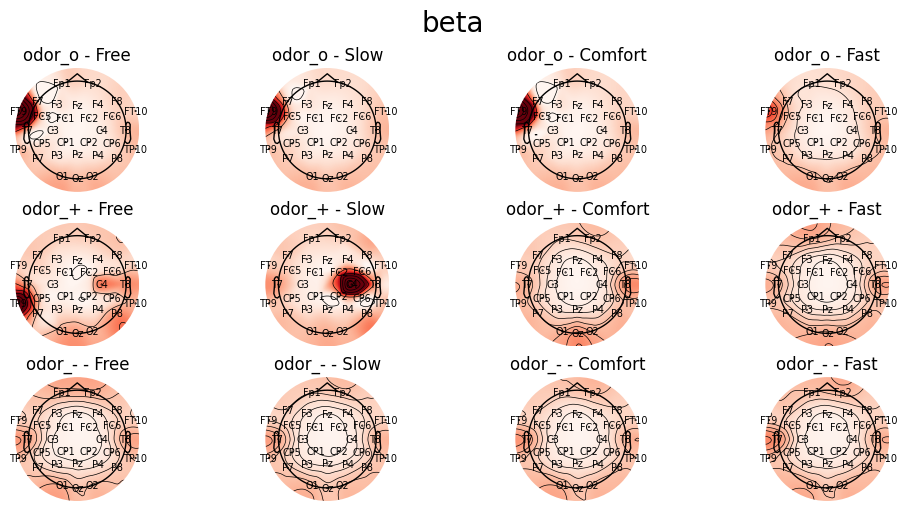

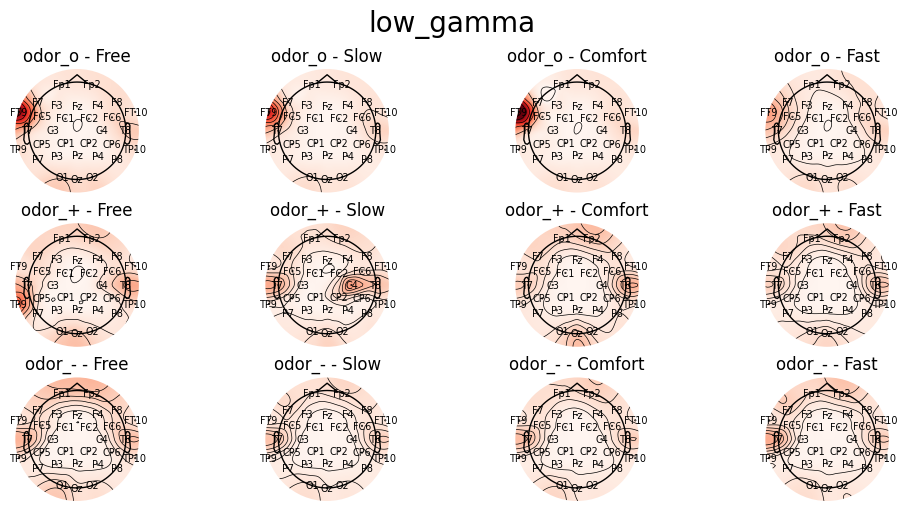

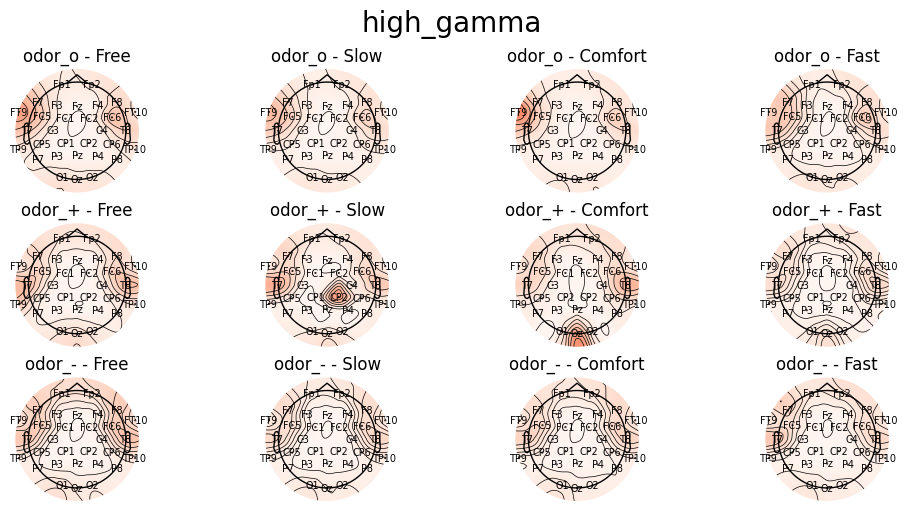

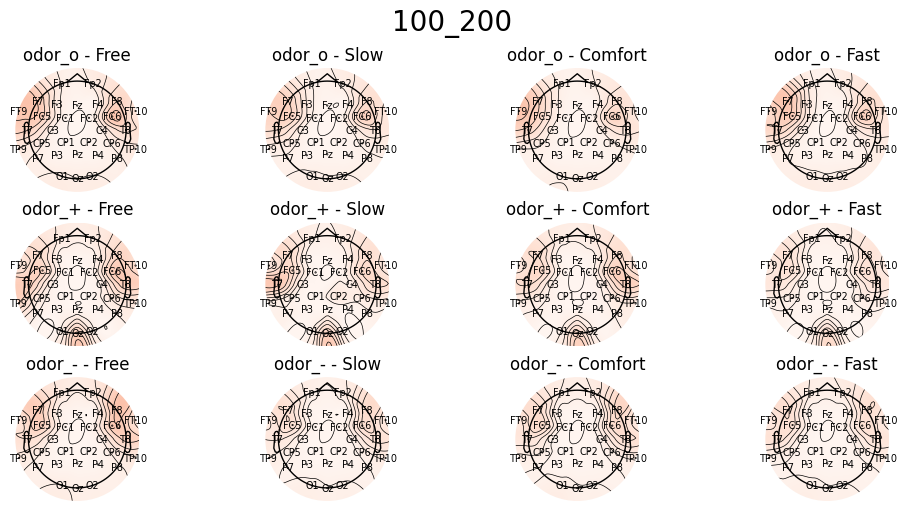

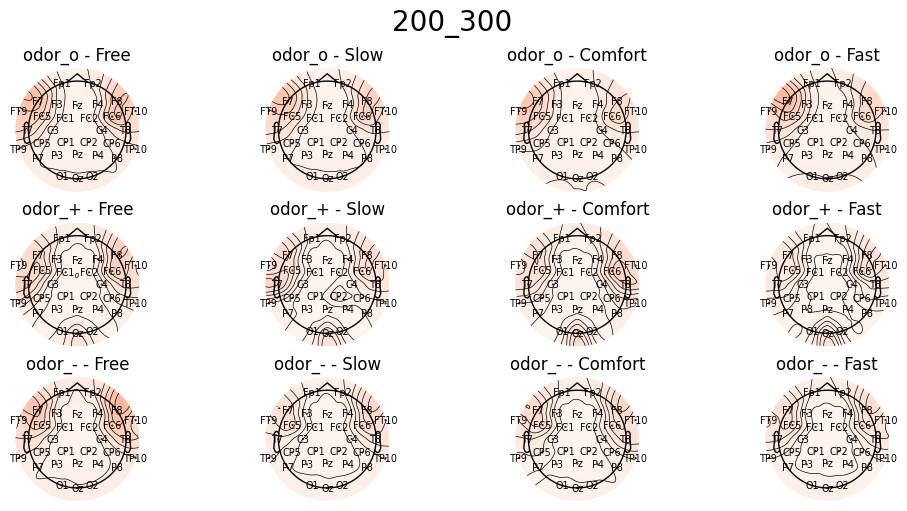

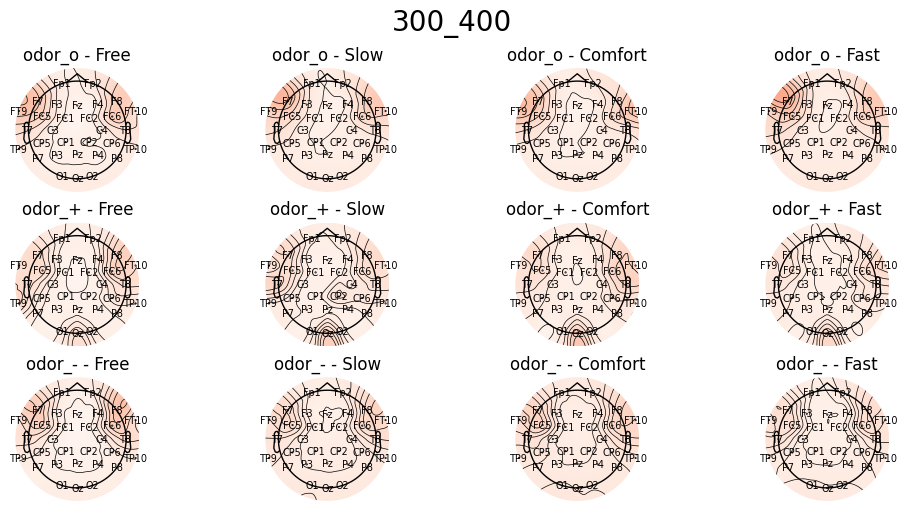

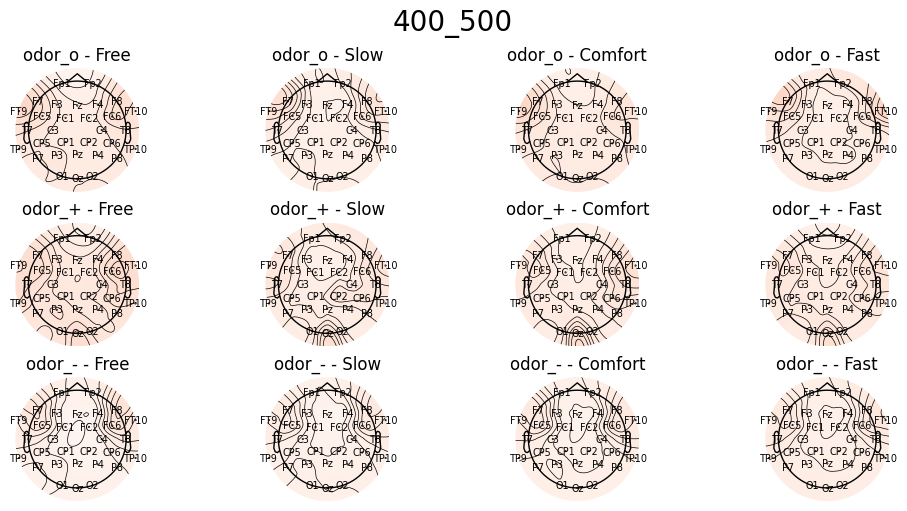

In [115]:
for band in fbands.keys():
    
    bandpower_of_band = bandpower[bandpower['band'] == band]
    
    delta = 0.005
    mini = bandpower_of_band['power'].quantile(delta)
    maxi = bandpower_of_band['power'].quantile(1 - delta)
    vlim = (mini,maxi)
    print(band, vlim)

    fig, axs = plt.subplots(nrows = len(odeurs), ncols = len(blocs),figsize = (10,5), constrained_layout = True)
    fig.suptitle(band, fontsize = 20)
    for r, odeur in enumerate(odeurs):
        for c, bloc in enumerate(blocs):
            ax = axs[r,c]
            mask = bandpower_of_band[(bandpower_of_band['odor'] == odeur) & (bandpower_of_band['bloc'] == bloc)]
            data_ready = mask.groupby('chan').mean(numeric_only = True)['power'].reindex(eeg_chans)
            data = data_ready.values
            image = mne.viz.plot_topomap(data=data,pos = info, names = eeg_chans, axes=ax, show = False, vlim=vlim, cmap = 'Reds')
            ax.set_title(f'{odeur} - {bloc}')